# **Research Question**


**Analyze the relationship between the number and type of educational facilities, the proportion of the population of the elderly and disabled, and the unemployment rate, especially for minors, young people, and the elderly. The machine learning method is used to predict the community unemployment rate and determine which communities have a significant relationship with educational facilities and demographic characteristics.**

分析教育设施数量和类型、老年人和残障人士的人口比例与失业率之间的关系，特别是针对未成年人、年轻人和老年人群体。并通过机器学习方法预测社区失业率，确定哪些社区的失业率与教育设施和人口特征有明显关系。

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **Data Preprocessing**

## **1. Extract the required columns:**


**Demographic data:** elderly, minors, young people, people with disabilities in 2007 and 2012
* ERP age 65-69, persons, ERP age 70-74, persons, ERP age 75-79, persons, ERP age 80-84, persons, ERP age 85+, persons
* ERP age 0-4, persons, ERP age 5-9, persons, ERP age 10-14, persons, ERP age 15-19, persons, ERP age 20-24, persons
* Unpaid carer to person with disability, persons

**Educational facilities:**
* Primary Schools, Secondary Schools, TAFE students, University students

**Unemployment rate:**
* Unemployed, %

In [55]:
# Read the file
file_path = 'communities.csv'
data = pd.read_csv(file_path)

In [56]:
# Define the columns to extract for 2012
columns_2012 = [
    '2012 ERP age 65-69, persons', '2012 ERP age 70-74, persons', '2012 ERP age 75-79, persons',
    '2012 ERP age 80-84, persons', '2012 ERP age 85+, persons', '2012 ERP age 0-4, persons',
    '2012 ERP age 5-9, persons', '2012 ERP age 10-14, persons', '2012 ERP age 15-19, persons',
    '2012 ERP age 20-24, persons'
]

# Define the columns to extract for 2007
columns_2007 = [
    '2007 ERP age 65-69, persons', '2007 ERP age 70-74, persons', '2007 ERP age 75-79, persons',
    '2007 ERP age 80-84, persons', '2007 ERP age 85+, persons', '2007 ERP age 0-4, persons',
    '2007 ERP age 5-9, persons', '2007 ERP age 10-14, persons', '2007 ERP age 15-19, persons',
    '2007 ERP age 20-24, persons'
]

# Define the columns with no specific year mentioned
columns_no_year = [
    'Unpaid carer to person with disability, persons', 'Primary Schools', 'Secondary Schools',
    'TAFE students', 'University students', 'Unemployed, %'
]

# Extract the data for 2012, 2007, and columns with no year
selected_data_2012 = data[columns_2012]
selected_data_2007 = data[columns_2007]
selected_data_no_year = data[columns_no_year]

# Concatenate the 2007, 2012, and no-year data into a single DataFrame for comparison
selected_data = pd.concat([selected_data_2007, selected_data_2012, selected_data_no_year], axis=1)

# Rename the columns to clearly differentiate between 2007 and 2012 data
selected_data.columns = [
    '2007 age 65-69', '2007 age 70-74', '2007 age 75-79', '2007 age 80-84', '2007 age 85+',
    '2007 age 0-4', '2007 age 5-9', '2007 age 10-14', '2007 age 15-19', '2007 age 20-24',
    '2012 age 65-69', '2012 age 70-74', '2012 age 75-79', '2012 age 80-84', '2012 age 85+',
    '2012 age 0-4', '2012 age 5-9', '2012 age 10-14', '2012 age 15-19', '2012 age 20-24',
    'Unpaid carer to person with disability', 'Primary Schools', 'Secondary Schools', 
    'TAFE students', 'University students', 'Unemployed % 2012'
]

# Display the first few rows of the dataset to check the format
selected_data.head()

,2007 age 65-69,2007 age 70-74,2007 age 75-79,2007 age 80-84,2007 age 85+,2007 age 0-4,2007 age 5-9,2007 age 10-14,2007 age 15-19,2007 age 20-24,...,2012 age 5-9,2012 age 10-14,2012 age 15-19,2012 age 20-24,Unpaid carer to person with disability,Primary Schools,Secondary Schools,TAFE students,University students,Unemployed % 2012
0,108.000000,98.000000,87.000000,77.000000,73.000000,208.000000,114.000000,152.000000,156.000000,397.000000,...,161,123,181,462,393,1,0,95,431,4.677364
1,119.444444,91.777777,115.666665,117.111110,118.888886,194.999996,283.444439,300.111106,272.111109,262.999998,...,273,303,311,279,404,3,1,56,217,3.811434
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,34,22,11,52,0,0,5,<5,5.921053
3,48.936521,48.098261,41.030434,19.546957,24.721739,69.990435,69.550434,58.521739,49.214782,40.002609,...,77,67,57,26,120,0,0,22,19,6.734694
4,20.066666,19.199999,12.666666,13.733333,6.866667,66.533328,40.266663,36.799997,44.799997,51.799996,...,35,32,26,29,63,0,0,8,20,2.922078


## **2. Handle Missing Values**

In [57]:
# Check the missing value
missing_values = selected_data.isnull().sum()
print("Missing Values:")
print(missing_values)



Missing Values:
2007 age 65-69                            372
2007 age 70-74                            372
2007 age 75-79                            372
2007 age 80-84                            372
2007 age 85+                              372
2007 age 0-4                              372
2007 age 5-9                              372
2007 age 10-14                            372
2007 age 15-19                            372
2007 age 20-24                            372
2012 age 65-69                              0
2012 age 70-74                              0
2012 age 75-79                              0
2012 age 80-84                              0
2012 age 85+                                0
2012 age 0-4                                0
2012 age 5-9                                0
2012 age 10-14                              0
2012 age 15-19                              0
2012 age 20-24                              0
Unpaid carer to person with disability      0
Primary Schools   

1.	Missing Data in 2007:
* The columns 2007 age 65-69 to 2007 age 20-24 each have 372 missing values. These columns represent the population data for different age groups in 2007.
* This suggests that many communities or regions did not report their population statistics for 2007.

2.	Data in 2012:
* The columns 2012 age 65-69 to 2012 age 20-24 have no missing values. These columns are complete and provide population data for various age groups in 2012.
* Since the 2012 data is complete, we can use it to fill in the missing values in the 2007 data.
	
3.	Other Columns with Missing Data:
* The column Unemployed % 2012 has 64 missing values, indicating that some areas did not report their unemployment rate.
* The columns Unpaid carer to person with disability, Primary Schools, Secondary Schools, TAFE students, and University students have no missing values.

In [58]:
# Fill in the missing values for 2007 using the 2012 mean

columns_2007 = [
    '2007 age 65-69', '2007 age 70-74', '2007 age 75-79',
    '2007 age 80-84', '2007 age 85+', '2007 age 0-4', 
    '2007 age 5-9', '2007 age 10-14', '2007 age 15-19', 
    '2007 age 20-24'
]

columns_2012 = [
    '2012 age 65-69', '2012 age 70-74', '2012 age 75-79',
    '2012 age 80-84', '2012 age 85+', '2012 age 0-4', 
    '2012 age 5-9', '2012 age 10-14', '2012 age 15-19', 
    '2012 age 20-24'
]

for col_2007, col_2012 in zip(columns_2007, columns_2012):
    selected_data[col_2007] = selected_data[col_2007].fillna(selected_data[col_2012].mean())

In [59]:
# Fill in the missing values using the mean of the unemployment rate column

selected_data['Unemployed % 2012'] = selected_data['Unemployed % 2012'].fillna(selected_data['Unemployed % 2012'].mean())

## **3. Handle Non-numeric Columns**

In [60]:
# Check the non-numeric columns
non_numeric_columns = selected_data.select_dtypes(exclude=['number']).columns
print("Non-numeric Columns:")
print(non_numeric_columns)

Non-numeric Columns:
Index(['Unpaid carer to person with disability', 'TAFE students',
       'University students'],
      dtype='object')


The non-numeric columns identified in your dataset are:

* Unpaid carer to person with disability
* TAFE students
* University students

These columns should be of numeric type, but are currently treated as non-numeric columns, possibly because of the presence of non-numeric characters (such as commas or other characters) in the data.

In [61]:
# Convert non-numeric columns to numeric, coercing errors to NaN
for col in non_numeric_columns:
    selected_data[col] = pd.to_numeric(selected_data[col], errors='coerce')

# Check if the conversion was successful
selected_data[non_numeric_columns].head()

,Unpaid carer to person with disability,TAFE students,University students
0,393.0,95.0,431.0
1,404.0,56.0,217.0
2,52.0,5.0,NaN
3,120.0,22.0,19.0
4,63.0,8.0,20.0


## **4. Recheck the data set for missing values**

In [62]:
missing_values = selected_data.isnull().sum()
print("Missing Values After Conversion:")
print(missing_values)

Missing Values After Conversion:
2007 age 65-69                              0
2007 age 70-74                              0
2007 age 75-79                              0
2007 age 80-84                              0
2007 age 85+                                0
2007 age 0-4                                0
2007 age 5-9                                0
2007 age 10-14                              0
2007 age 15-19                              0
2007 age 20-24                              0
2012 age 65-69                              0
2012 age 70-74                              0
2012 age 75-79                              0
2012 age 80-84                              0
2012 age 85+                                0
2012 age 0-4                                0
2012 age 5-9                                0
2012 age 10-14                              0
2012 age 15-19                              0
2012 age 20-24                              0
Unpaid carer to person with disability      3
P

**Handle missing values in the column Unpaid carer to person with disability**

Fill with the mean: Replaces the missing value of a column with the mean of that column.

In [63]:
selected_data['Unpaid carer to person with disability'] = selected_data['Unpaid carer to person with disability'].fillna(selected_data['Unpaid carer to person with disability'].mean())

**Handles missing values in TAFE students and University students columns**

The high number of missing values in these two columns, 83 and 105 respectively, could mean that there are no TAFE students or university students in some communities, or that the data is not being reported. I use 0 padding here: Since some areas may indeed have no TAFE or university students, use 0 to represent these areas.

In [64]:
selected_data['TAFE students'] = selected_data['TAFE students'].fillna(0)
selected_data['University students'] = selected_data['University students'].fillna(0)

## **5. Data Scaling**

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
# Define the columns that need to be standardized
columns_to_standardize = [
    '2007 age 65-69', '2007 age 70-74', '2007 age 75-79', '2007 age 80-84', '2007 age 85+',
    '2007 age 0-4', '2007 age 5-9', '2007 age 10-14', '2007 age 15-19', '2007 age 20-24',
    '2012 age 65-69', '2012 age 70-74', '2012 age 75-79', '2012 age 80-84', '2012 age 85+',
    '2012 age 0-4', '2012 age 5-9', '2012 age 10-14', '2012 age 15-19', '2012 age 20-24',
    'Unpaid carer to person with disability', 'Primary Schools', 'Secondary Schools', 
    'TAFE students', 'University students', 'Unemployed % 2012'
]

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the selected columns
selected_data[columns_to_standardize] = scaler.fit_transform(selected_data[columns_to_standardize])

# Display the first few rows of the standardized data
selected_data.head()

,2007 age 65-69,2007 age 70-74,2007 age 75-79,2007 age 80-84,2007 age 85+,2007 age 0-4,2007 age 5-9,2007 age 10-14,2007 age 15-19,2007 age 20-24,...,2012 age 5-9,2012 age 10-14,2012 age 15-19,2012 age 20-24,Unpaid carer to person with disability,Primary Schools,Secondary Schools,TAFE students,University students,Unemployed % 2012
0,-0.623963,-0.522604,-0.464264,-0.385174,-0.330546,-0.498209,-0.712380,-0.604314,-0.627285,-0.159304,...,-0.376921,-0.455224,-0.352637,0.082148,-0.155923,-0.353729,-0.485226,-0.130006,0.394857,-0.241537
1,-0.576163,-0.552987,-0.305895,-0.101871,0.045310,-0.530068,-0.290259,-0.253795,-0.365156,-0.410634,...,-0.142298,-0.061334,-0.089139,-0.200306,-0.138142,0.753596,1.003536,-0.358547,-0.052616,-0.592289
2,-0.035149,-0.087481,-0.149096,-0.131647,-0.046622,-0.126392,-0.147056,-0.180626,-0.178079,-0.137216,...,-0.682768,-0.649980,-0.674915,-0.613953,-0.707135,-0.907392,-0.485226,-0.657409,-0.506361,0.262230
3,-0.870651,-0.766274,-0.718223,-0.790962,-0.725973,-0.836427,-0.823113,-0.825540,-0.868360,-0.828885,...,-0.552888,-0.577767,-0.603973,-0.590801,-0.597216,-0.907392,-0.485226,-0.557788,-0.466632,0.591802
4,-0.991231,-0.907383,-0.874918,-0.832023,-0.872216,-0.844899,-0.896065,-0.876946,-0.878327,-0.806758,...,-0.640871,-0.654357,-0.666807,-0.586171,-0.689354,-0.907392,-0.485226,-0.639829,-0.464541,-0.952530


# **Data Analysis**

## **1.Demographic Distribution Analysis**

<Figure size 1000x600 with 0 Axes>

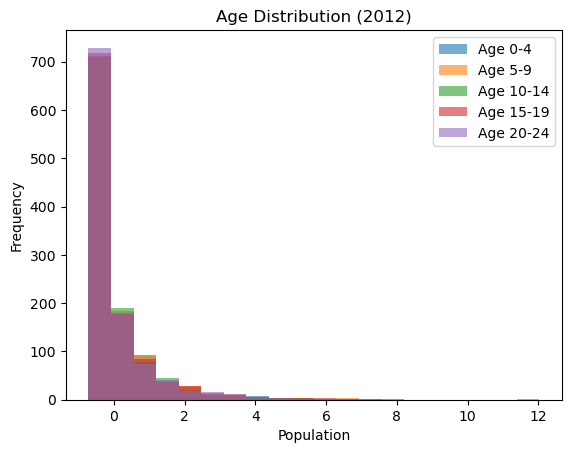

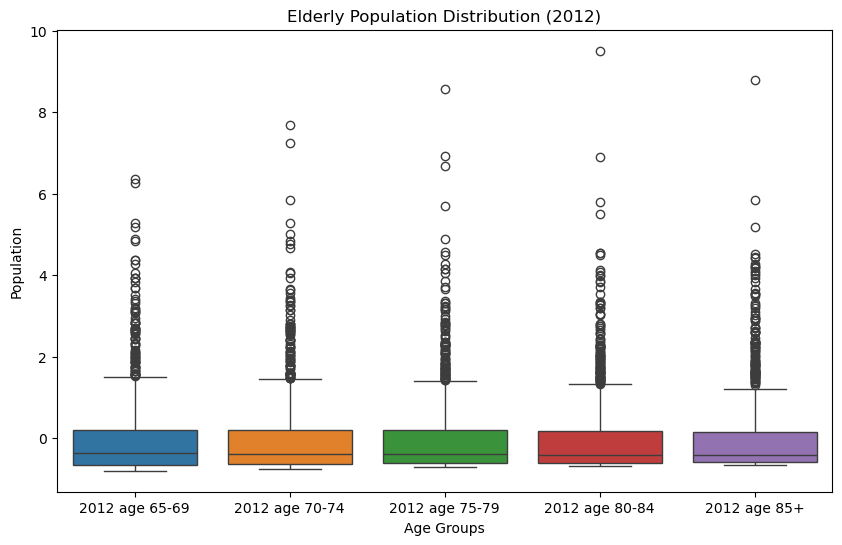

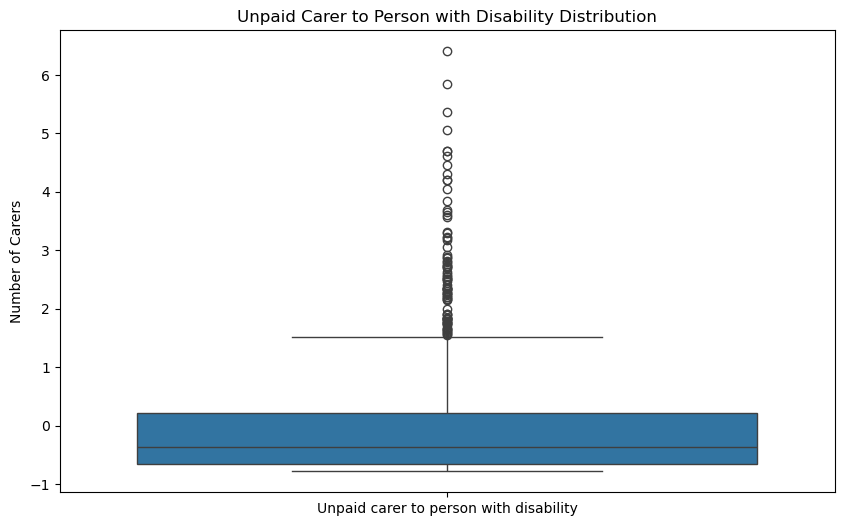

In [78]:
# Histogram - Shows the population distribution by age group
plt.figure(figsize=(10, 6))
selected_data[['2012 age 0-4', '2012 age 5-9', '2012 age 10-14', '2012 age 15-19', '2012 age 20-24']].plot.hist(alpha=0.6, bins=20)
plt.title('Age Distribution (2012)')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24'])
plt.show()

# Box plot - shows the distribution of the elderly population in the community
plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_data[['2012 age 65-69', '2012 age 70-74', '2012 age 75-79', '2012 age 80-84', '2012 age 85+']])
plt.title('Elderly Population Distribution (2012)')
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.show()

# Box plot - Shows the distribution of disability service facilities
plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_data[['Unpaid carer to person with disability']])
plt.title('Unpaid Carer to Person with Disability Distribution')
plt.ylabel('Number of Carers')
plt.show()

## **2.Correlation Analysis**

Pearson Correlation Matrix:
                     Primary Schools  Secondary Schools  TAFE students  \
Primary Schools             1.000000           0.504570       0.674267   
Secondary Schools           0.504570           1.000000       0.673199   
TAFE students               0.674267           0.673199       1.000000   
University students         0.375664           0.476162       0.669495   
2012 age 0-4                0.627313           0.611529       0.906623   
2012 age 5-9                0.658045           0.610229       0.900150   
2012 age 10-14              0.681909           0.618976       0.901057   
2012 age 15-19              0.678646           0.645767       0.923349   
2012 age 20-24              0.548638           0.631690       0.891054   
2012 age 65-69              0.719803           0.639027       0.862151   
2012 age 70-74              0.700212           0.645234       0.844860   
Unemployed % 2012          -0.002650           0.080151       0.133856   

         

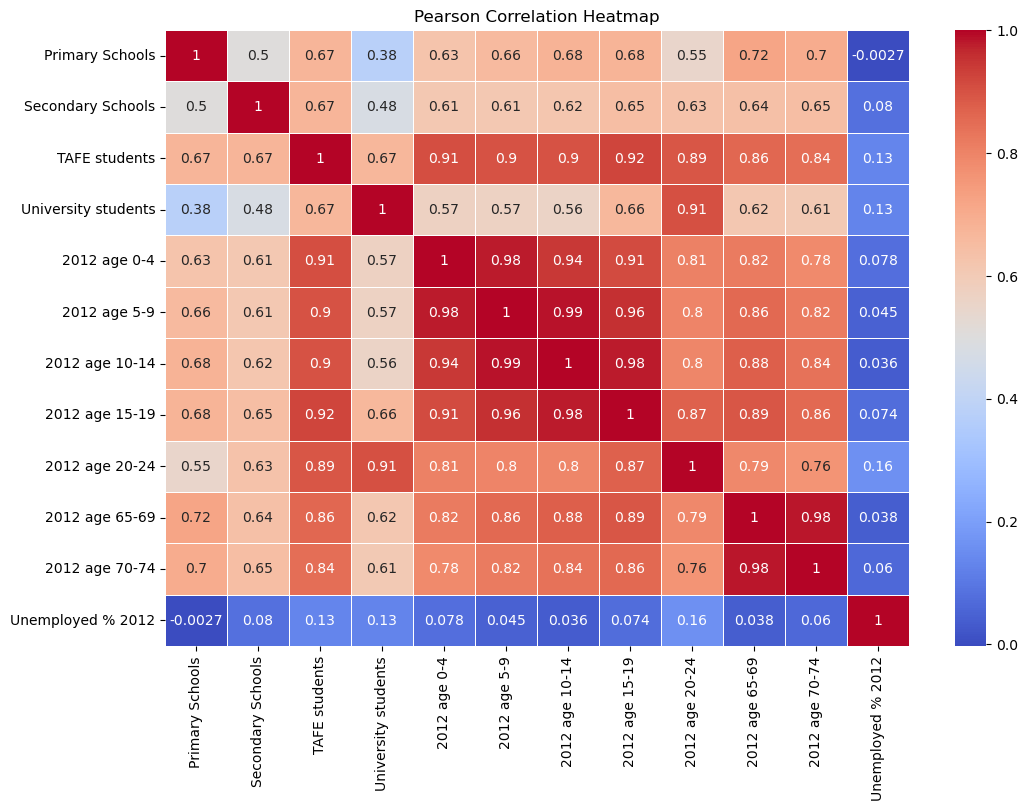

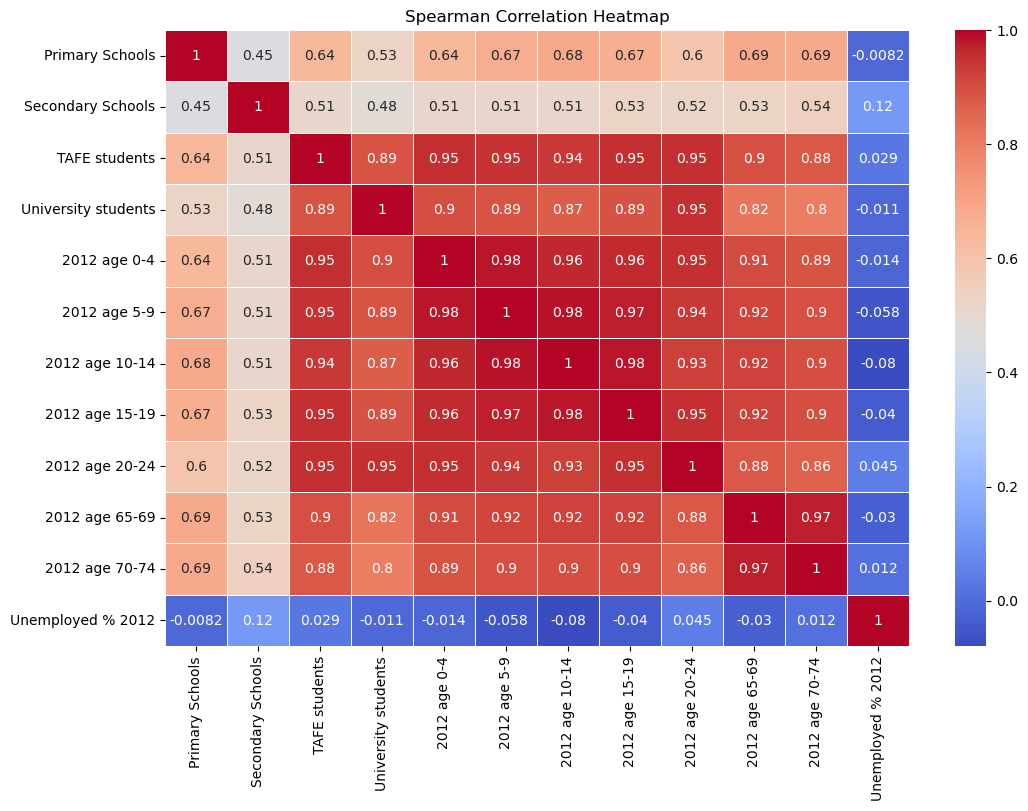

In [80]:
# Pearson Correlation Coefficient - Look at the linear correlation between educational facilities, demographics, and unemployment rates
pearson_corr = selected_data[['Primary Schools', 'Secondary Schools', 'TAFE students', 'University students',
                              '2012 age 0-4', '2012 age 5-9', '2012 age 10-14', '2012 age 15-19', '2012 age 20-24',
                              '2012 age 65-69', '2012 age 70-74', 'Unemployed % 2012']].corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr)

# Spearman correlation coefficient - used to capture nonlinear correlations
spearman_corr = selected_data[['Primary Schools', 'Secondary Schools', 'TAFE students', 'University students',
                               '2012 age 0-4', '2012 age 5-9', '2012 age 10-14', '2012 age 15-19', '2012 age 20-24',
                               '2012 age 65-69', '2012 age 70-74', 'Unemployed % 2012']].corr(method='spearman')
print("Spearman Correlation Matrix:")
print(spearman_corr)

# Heatmap - shows correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

## **3. Trend Analysis**

# **Machine Learning**
## **1.Feature selection**

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [84]:
X = selected_data[['2012 age 65-69', '2012 age 70-74', '2012 age 75-79', '2012 age 80-84',
                   '2012 age 85+', 'Primary Schools', 'Secondary Schools', 'TAFE students', 
                   'University students', 'Unpaid carer to person with disability']]
y = selected_data['Unemployed % 2012']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **2. Linear Regression**

Use a linear regression model to predict the unemployment rate and evaluate its effect.

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.726886481181232
R-squared: 0.12036928955830084


## **3. Decision tree model**

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Mean Squared Error: {mse_dt}')
print(f'Decision Tree R-squared: {r2_dt}')

Decision Tree Mean Squared Error: 1.3224566752091707
Decision Tree R-squared: -0.6003509968327165


## **4.K-means Cluster**

In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


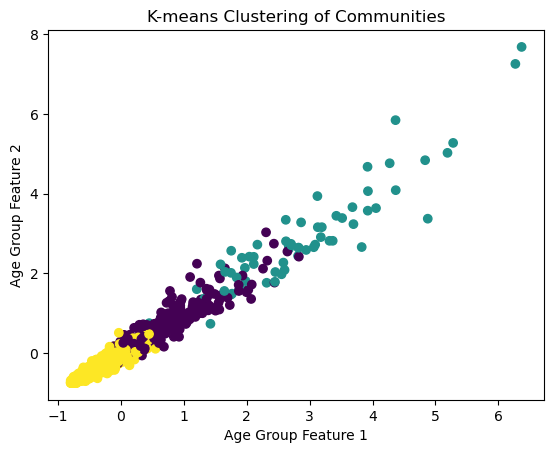

In [95]:

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering of Communities')
plt.xlabel('Age Group Feature 1')
plt.ylabel('Age Group Feature 2')
plt.show()

## **5. Random Forest model**

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

importances = rf_model.feature_importances_
feature_names = X.columns
for feature, importance in zip(feature_names, importances):
    print(f'{feature}: {importance}')

Random Forest Mean Squared Error: 0.7864096251262056
Random Forest R-squared: 0.04833825479348408
2012 age 65-69: 0.14686047932441115
2012 age 70-74: 0.06377089506192571
2012 age 75-79: 0.0701471447479379
2012 age 80-84: 0.07087427592476836
2012 age 85+: 0.09132986622624255
Primary Schools: 0.025567718742819916
Secondary Schools: 0.007811217049045478
TAFE students: 0.13946023702824598
University students: 0.1425085760262233
Unpaid carer to person with disability: 0.24166958986837955
